In [29]:
import os
import cv2
import nibabel as nib
from nibabel.testing import data_path

# 取得 NIfTI 1 範例影像路徑
example_ni1 = os.path.join(data_path, 'D:/IACTA/task1/imgTr/sub-0001.nii.gz')

# 載入 NIfTI 1 範例影像
n1_img = nib.load(example_ni1)

In [8]:
print(n1_img.dataobj.shape)

(146, 182, 133)


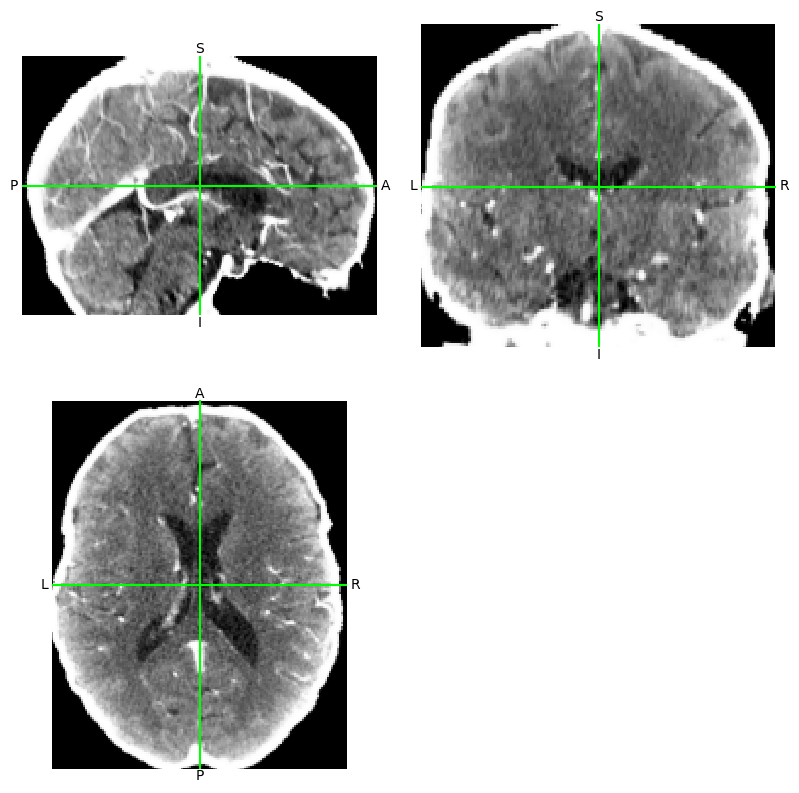

In [31]:
from nibabel.viewers import OrthoSlicer3D

# 建立 OrthoSlicer3D Viewer 物件
osViewer = OrthoSlicer3D(n1_img.dataobj[:,:,:])

# 設定三軸的切面位置
img_shape = n1_img.dataobj.shape
osViewer.set_position(img_shape[0]/2, img_shape[1]/2, img_shape[2]/2)

# 顯示三軸切面
osViewer.show()

In [32]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [33]:
import nibabel as nib
epi_img1 = nib.load(example_ni1)
epi_img1_data = epi_img1.get_fdata()
epi_img1_data.shape

(146, 182, 133)

In [34]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

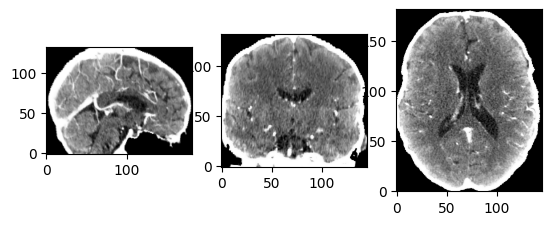

In [35]:
slice_0 = epi_img1_data[73, :, :]
slice_1 = epi_img1_data[:, 91, :]
slice_2 = epi_img1_data[:, :, 66]
show_slices([slice_0, slice_1, slice_2])

In [36]:
w = int(slice_2.shape[0] / 2)
h = int(slice_2.shape[1] / 2)

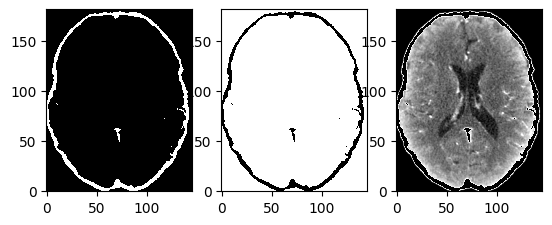

In [37]:
arr = slice_2
arr = np.where(arr>97, 1, 0)
arr2 = slice_2
arr2 = np.where(arr2>97, 1, 0)
arr2 = np.where(arr2==1, 0, 1)
arr3 = slice_2
arr3 = np.where(arr3>97, 0, arr3)

show_slices([arr, arr2, arr3])

In [38]:
import numpy as np
res = slice_2

def findPath(mat):
#   parientm
    parientm = (-1,-1)
    path_len, paths = getMax(mat, getNeighbours(mat), startm, parientm, dict())
    for node in paths:
      res[node//(len(mat[0])+1)][node%(len(mat[0])+1)] = 0


def getNeighbours(mat):
    neighbours = dict()
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            n = (i-1, j) if i-1 >= 0 else (-1, -1)
            a = (i-1, j+1) if i-1 >= 0 and j+1 < len(mat[i]) else (-1, -1)
            e = (i, j+1) if j+1 < len(mat[i]) else (-1, -1)
            b = (i+1, j+1) if i+1 < len(mat) and j+1 < len(mat[i]) else (-1, -1)
            s = (i+1, j) if i+1 < len(mat) else (-1, -1)
            c = (i+1, j-1) if i+1 < len(mat) and j-1 >= 0 else (-1, -1)
            w = (i, j-1) if j-1 >= 0 else (-1, -1)
            d = (i-1, j-1) if i-1 >= 0 and j-1 >= 0 else (-1, -1)
            neighbours[(i,j)] = {'n':n, 's':s, 'w':w, 'e':e, 'a':a, 'b':b, 'c':c, 'd':d}
    return neighbours

def getMax(mat, neighbours, coordinates, parient, visited):
    if coordinates == (-1,-1):
        return -1, []
    elif mat[coordinates[0]][coordinates[1]] == 1:
        return -1, []
    elif visited.get(coordinates[0]*(len(mat[0])+1)+coordinates[1], 0) != 0:
        return -1, []
    else:
        visited[coordinates[0]*(len(mat[0])+1)+coordinates[1]]= parient
        n, nlist = getMax(mat, neighbours, neighbours[coordinates]['n'], coordinates, visited)
        s, slist = getMax(mat, neighbours, neighbours[coordinates]['s'], coordinates, visited)
        w, wlist = getMax(mat, neighbours, neighbours[coordinates]['w'], coordinates, visited)
        e, elist = getMax(mat, neighbours, neighbours[coordinates]['e'], coordinates, visited)
        a, alist = getMax(mat, neighbours, neighbours[coordinates]['a'], coordinates, visited)
        b, blist = getMax(mat, neighbours, neighbours[coordinates]['b'], coordinates, visited)
        c, clist = getMax(mat, neighbours, neighbours[coordinates]['c'], coordinates, visited)
        d, dlist = getMax(mat, neighbours, neighbours[coordinates]['d'], coordinates, visited)

        if max(n,s,w,e,a,b,c,d) == -1:
            return 0, visited
        if max(n,s,w,e,a,b,c,d) == n:
            visited = nlist     
        elif max(n,s,w,e,a,b,c,d) == s:
            visited = slist     
        elif max(n,s,w,e,a,b,c,d) == w:
            visited = wlist     
        elif max(n,s,w,e,a,b,c,d) == e:
            visited = elist     
        elif max(n,s,w,e,a,b,c,d) == a:
            visited = alist     
        elif max(n,s,w,e,a,b,c,d) == b:
            visited = blist     
        elif max(n,s,w,e,a,b,c,d) == c:
            visited = clist     
        elif max(n,s,w,e,a,b,c,d) == d:
            visited = dlist     
        return 1+max(n,s,w,e,a,b,c,d), visited


mat = arr2

# This part is to find the start coordinate"
startm = (0,0)
mt = np.transpose(mat)
start_found = False
for i in range(len(mt)):
  for j in range(len(mt[i])):
    if start_found == False:
      if mt[i][j] == 0:
        start_found = True
        startm = j,i
# End of this part is to find the start coordinate"

print("startm", startm)
findPath(mat)

startm (55, 0)


In [39]:
# show_slices([arr, res, arr3])

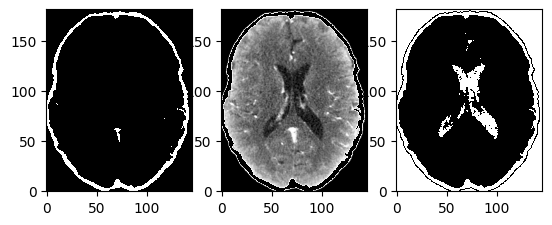

In [40]:
resTest = res
resTest = np.where(resTest>20, 0, 1)
show_slices([arr, res, resTest])

In [41]:
import numpy as np

def findPath(mat):
#   parientm
    parientm = (-1,-1)
    path_len, paths = getMax(mat, getNeighbours(mat), startm, parientm, dict())
    for node in paths:
      res[node//(len(mat[0])+1)][node%(len(mat[0])+1)] = 0


def getNeighbours(mat):
    neighbours = dict()
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            n = (i-1, j) if i-1 >= 0 else (-1, -1)
            a = (i-1, j+1) if i-1 >= 0 and j+1 < len(mat[i]) else (-1, -1)
            e = (i, j+1) if j+1 < len(mat[i]) else (-1, -1)
            b = (i+1, j+1) if i+1 < len(mat) and j+1 < len(mat[i]) else (-1, -1)
            s = (i+1, j) if i+1 < len(mat) else (-1, -1)
            c = (i+1, j-1) if i+1 < len(mat) and j-1 >= 0 else (-1, -1)
            w = (i, j-1) if j-1 >= 0 else (-1, -1)
            d = (i-1, j-1) if i-1 >= 0 and j-1 >= 0 else (-1, -1)
            neighbours[(i,j)] = {'n':n, 's':s, 'w':w, 'e':e, 'a':a, 'b':b, 'c':c, 'd':d}
    return neighbours

def getMax(mat, neighbours, coordinates, parient, visited):
#    print("coordinates", coordinates, "visited", visited)
#    start = coordinates
    if coordinates == (-1,-1):
        return -1, []
    elif mat[coordinates[0]][coordinates[1]] == 1:
        return -1, []
    elif visited.get(coordinates[0]*(len(mat[0])+1)+coordinates[1], 0) != 0:
        return -1, []
    else:
        visited[coordinates[0]*(len(mat[0])+1)+coordinates[1]]= parient
        n, nlist = getMax(mat, neighbours, neighbours[coordinates]['n'], coordinates, visited)
        s, slist = getMax(mat, neighbours, neighbours[coordinates]['s'], coordinates, visited)
        w, wlist = getMax(mat, neighbours, neighbours[coordinates]['w'], coordinates, visited)
        e, elist = getMax(mat, neighbours, neighbours[coordinates]['e'], coordinates, visited)
        a, alist = getMax(mat, neighbours, neighbours[coordinates]['a'], coordinates, visited)
        b, blist = getMax(mat, neighbours, neighbours[coordinates]['b'], coordinates, visited)
        c, clist = getMax(mat, neighbours, neighbours[coordinates]['c'], coordinates, visited)
        d, dlist = getMax(mat, neighbours, neighbours[coordinates]['d'], coordinates, visited)

        if max(n,s,w,e,a,b,c,d) == -1:
            return 0, visited
        if max(n,s,w,e,a,b,c,d) == n:
            visited = nlist     
        elif max(n,s,w,e,a,b,c,d) == s:
            visited = slist     
        elif max(n,s,w,e,a,b,c,d) == w:
            visited = wlist     
        elif max(n,s,w,e,a,b,c,d) == e:
            visited = elist     
        elif max(n,s,w,e,a,b,c,d) == a:
            visited = alist     
        elif max(n,s,w,e,a,b,c,d) == b:
            visited = blist     
        elif max(n,s,w,e,a,b,c,d) == c:
            visited = clist     
        elif max(n,s,w,e,a,b,c,d) == d:
            visited = dlist     
        return 1+max(n,s,w,e,a,b,c,d), visited


mat = resTest

# This part is to find the start coordinate"
startm = (0,0)
mt = np.transpose(mat)
start_found = False
for i in range(len(mt)):
  for j in range(len(mt[i])):
    if start_found == False:
      if mt[i][j] == 0:
        start_found = True
        startm = j,i
# End of this part is to find the start coordinate"
#
print("startm", startm)
findPath(mat)

startm (52, 0)


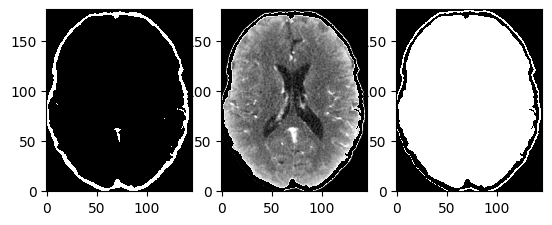

In [42]:
res2 = res
res2 = np.where(res2>0, 1, 0)
show_slices([arr, res, res2])

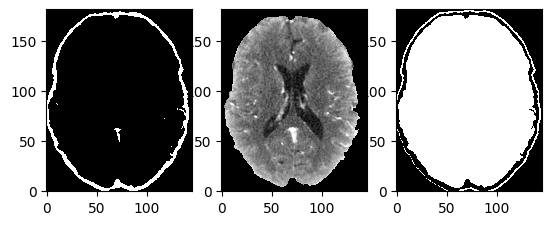

In [43]:
for i in range(1, 145):
    for j in range(1, 181):
        x1 = res2[i-1][j-1]
        x2 = res2[i][j-1]
        x3 = res2[i+1][j-1]
        x4 = res2[i-1][j]
        x5 = res2[i+1][j]
        x6 = res2[i-1][j+1]
        x7 = res2[i][j+1]
        x8 = res2[i+1][j+1]
        total = x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8
        if total < 8:
            res[i][j] = 0
for i in range(146):
    for j in range(182):
        if i==0 or j==0 or i==145 or j==181:
            res[i][j] = 0
show_slices([arr, res, res2])

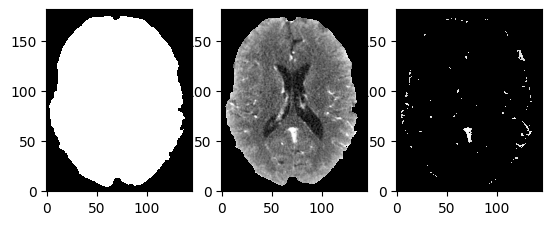

In [93]:
ress = res
ress = np.where(ress>80, ress, 0)
show_slices([res2, res, ress])

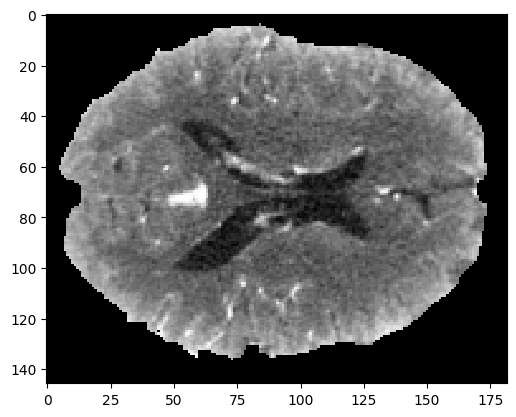

In [94]:
from matplotlib import pyplot as plt
plt.imshow(res, interpolation='nearest', cmap='gray')
plt.show()

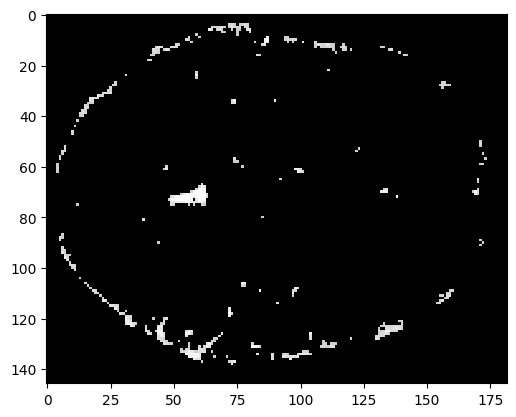

In [33]:
plt.imshow(ress, interpolation='nearest', cmap='gray')
plt.show()

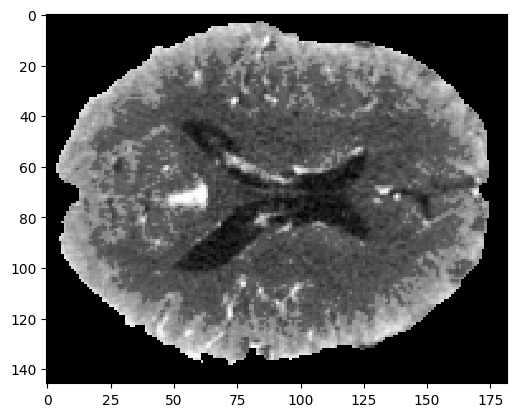

In [34]:
test = res
test = np.where(test>50, test+test/10, test-test/10)
plt.imshow(test, interpolation='nearest', cmap='gray')
plt.show()